In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import glob

### Split data by season for seasonal analysis

In [43]:

def split_data_by_season(file_path, output_dir):
    # read in the merged_file which contains all 335000 records
    df = pd.read_csv(file_path)

    os.makedirs(output_dir, exist_ok=True)
    
    # Define seasons
    seasons = {
        'winter': [12, 1, 2],
        'spring': [3, 4, 5],
        'summer': [6, 7, 8],
        'fall': [9, 10, 11]
    }
    
    for season_name, months in seasons.items():
        season_df = df[df['Month'].isin(months)]
        output_file = os.path.join(output_dir, f"{season_name}.csv")
        season_df.to_csv(output_file, index=False)
        print(f"Saved: {output_file}")

# File paths
train_file = "X:/studentresearch/precipitation_nganga/graduateprogram/Summer2025CourseItems/Thesis/merged_file.csv"
train_output_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Summer2025CourseItems/Thesis/seasonal_train_files"

split_data_by_season(train_file, train_output_dir)

In [2]:
#This funtion loads each season's csv file into a df

winter_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/seasonal_train_files/winter.csv")          
spring_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/seasonal_train_files/spring.csv")
summer_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/seasonal_train_files/summer.csv")
fall_df = pd.read_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/seasonal_train_files/fall.csv") 
                        
# Show the first few rows of each season's data
print(winter_df.head())
print(spring_df.head())
print(summer_df.head())
print(fall_df.head())


   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      1    1     0.3      2.2     85.0     0.00735        64.0   
1  2000      1    2     0.0      3.4     89.4     0.00845       118.9   
2  2000      1    3     0.0      4.2     92.3     0.00844       149.3   
3  2000      1    4     4.2      4.1     95.5     0.00825        92.4   
4  2000      1    5     0.0      3.3    100.0     0.00355       161.0   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion  
0      1.9                            170              3  
1      2.7                            167              3  
2      3.1                            170              3  
3      5.9                            202              3  
4      4.2                            320              3  
   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      3    1     0.0      5.5    100.0     0.00769       230.2   
1  2000      3    2     0.0      6.3    100.0     0.00712    

In [3]:
# Display the percentage of missing values for each month
def check_missing_values(season_missing):
    missing_percentage = season_missing.isnull().sum() / len(season_missing) * 100

    
    return pd.DataFrame(missing_percentage)


missing_df1 = check_missing_values(winter_df)
missing_df2 = check_missing_values(spring_df)
missing_df3 = check_missing_values(summer_df)
missing_df4 = check_missing_values(fall_df)

print(missing_df1)
print(missing_df2)
print(missing_df3)
print(missing_df4)


                                      0
Year                           0.000000
Month                          0.000000
Day                            0.000000
pr(mm)                         0.000000
etr(mm)                        2.631579
rmax(%)                        0.000000
sph(kg/kg)                     0.000000
srad(Wm-2)                     0.000000
vs(mps)                        0.000000
th(DegreesClockwisefromnorth)  0.000000
ClimateRegion                  0.000000
                                      0
Year                           0.000000
Month                          0.000000
Day                            0.000000
pr(mm)                         0.000000
etr(mm)                        2.631579
rmax(%)                        0.000000
sph(kg/kg)                     0.000000
srad(Wm-2)                     0.000000
vs(mps)                        0.000000
th(DegreesClockwisefromnorth)  0.000000
ClimateRegion                  0.000000
                                      0


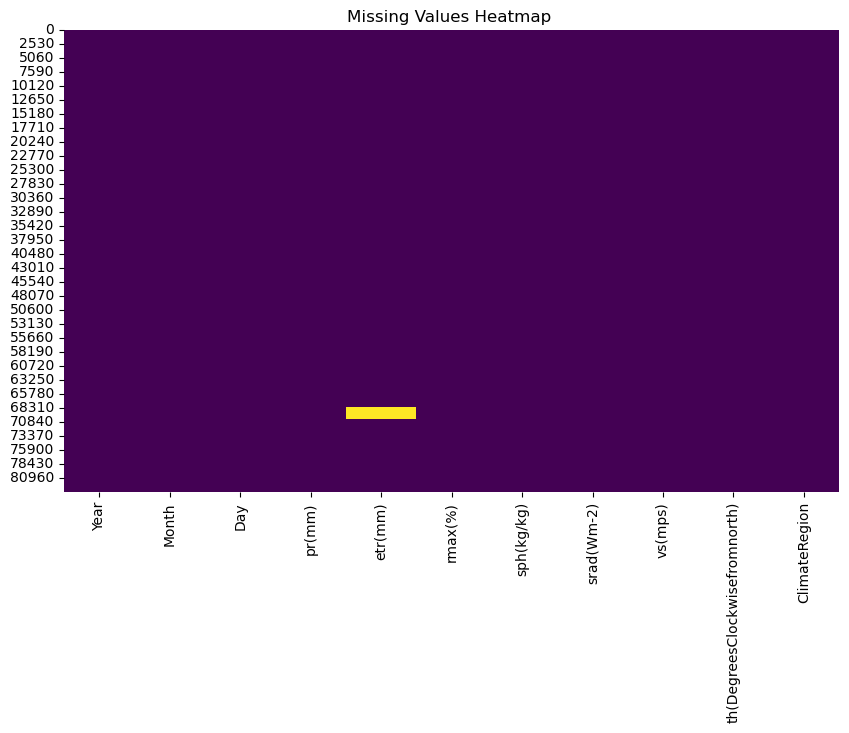

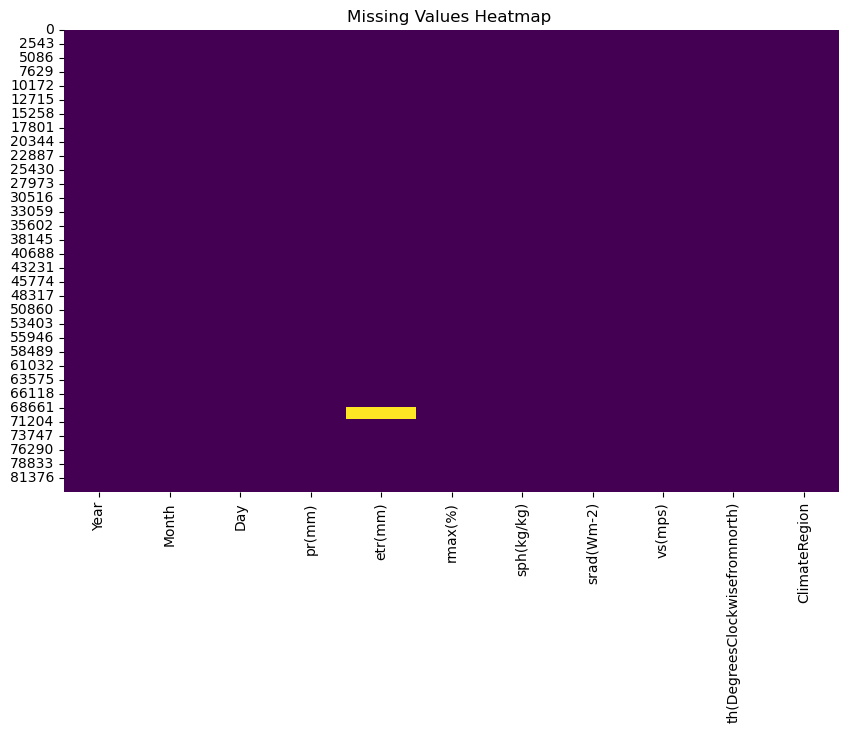

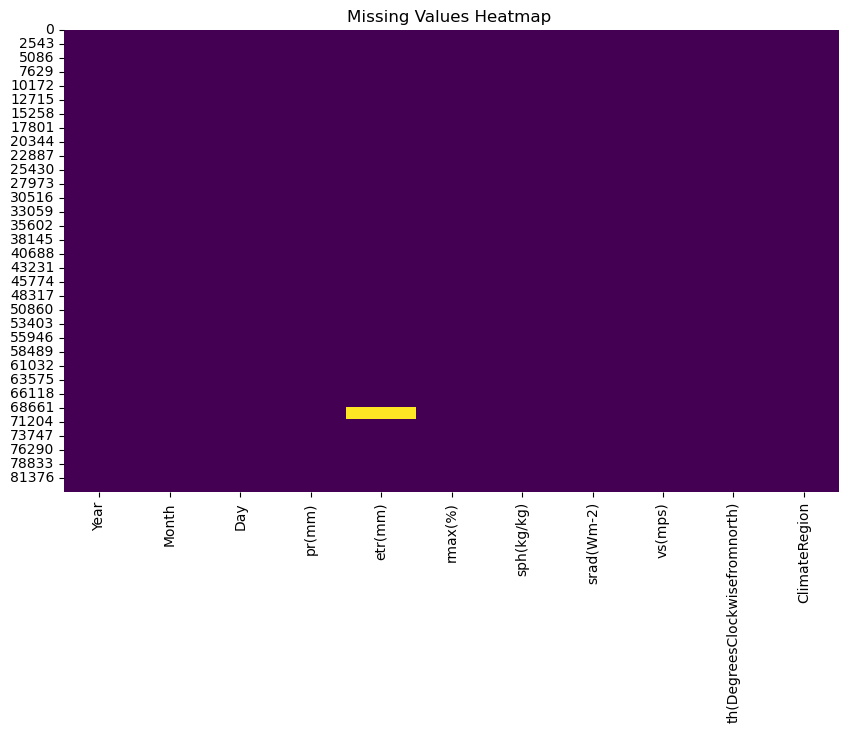

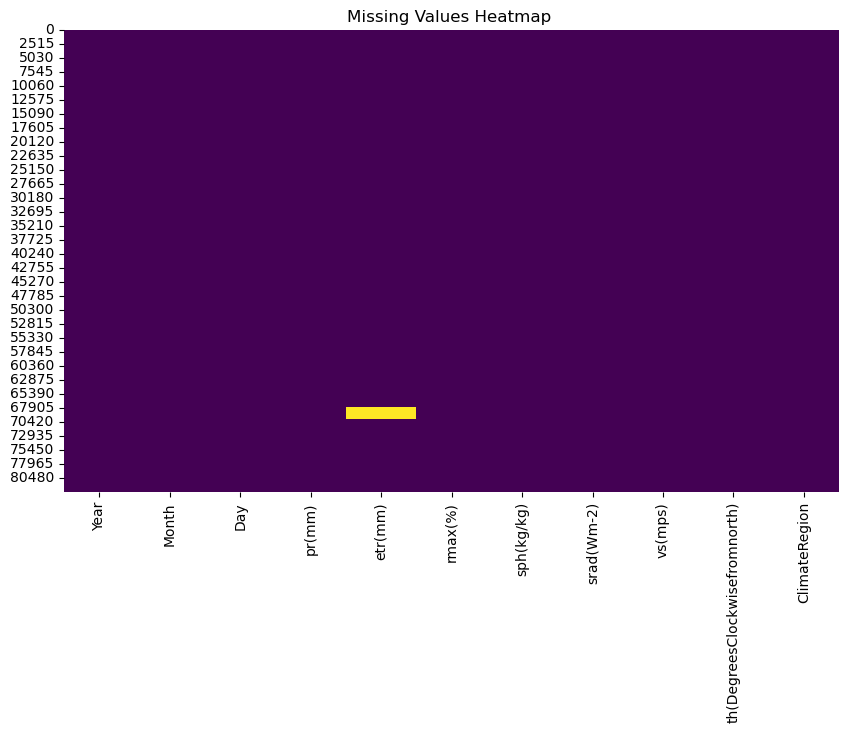

In [4]:
# create heat maps to show the percentage of missing values for each month for training data

def plot_missing_values_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(f"Missing Values Heatmap ")
    plt.show()

plot_missing_values_heatmap(winter_df)
plot_missing_values_heatmap(spring_df)
plot_missing_values_heatmap(summer_df)
plot_missing_values_heatmap(fall_df)



In [6]:
# median imputation
winter_df['etr(mm)'] = winter_df['etr(mm)'].fillna(winter_df['etr(mm)'].median())
spring_df['etr(mm)'] = spring_df['etr(mm)'].fillna(spring_df['etr(mm)'].median())
summer_df['etr(mm)'] = summer_df['etr(mm)'].fillna(summer_df['etr(mm)'].median())
fall_df['etr(mm)'] = fall_df['etr(mm)'].fillna(fall_df['etr(mm)'].median())

print(winter_df.isnull().sum())
print(spring_df.isnull().sum())
print(summer_df.isnull().sum())
print(fall_df.isnull().sum())     
       

Year                             0
Month                            0
Day                              0
pr(mm)                           0
etr(mm)                          0
rmax(%)                          0
sph(kg/kg)                       0
srad(Wm-2)                       0
vs(mps)                          0
th(DegreesClockwisefromnorth)    0
ClimateRegion                    0
dtype: int64
Year                             0
Month                            0
Day                              0
pr(mm)                           0
etr(mm)                          0
rmax(%)                          0
sph(kg/kg)                       0
srad(Wm-2)                       0
vs(mps)                          0
th(DegreesClockwisefromnorth)    0
ClimateRegion                    0
dtype: int64
Year                             0
Month                            0
Day                              0
pr(mm)                           0
etr(mm)                          0
rmax(%)                      

In [7]:
# Show the first few rows of each season's data
print(winter_df.head())
print(spring_df.head())
print(summer_df.head())
print(fall_df.head())


   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      1    1     0.3      2.2     85.0     0.00735        64.0   
1  2000      1    2     0.0      3.4     89.4     0.00845       118.9   
2  2000      1    3     0.0      4.2     92.3     0.00844       149.3   
3  2000      1    4     4.2      4.1     95.5     0.00825        92.4   
4  2000      1    5     0.0      3.3    100.0     0.00355       161.0   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion  
0      1.9                            170              3  
1      2.7                            167              3  
2      3.1                            170              3  
3      5.9                            202              3  
4      4.2                            320              3  
   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      3    1     0.0      5.5    100.0     0.00769       230.2   
1  2000      3    2     0.0      6.3    100.0     0.00712    

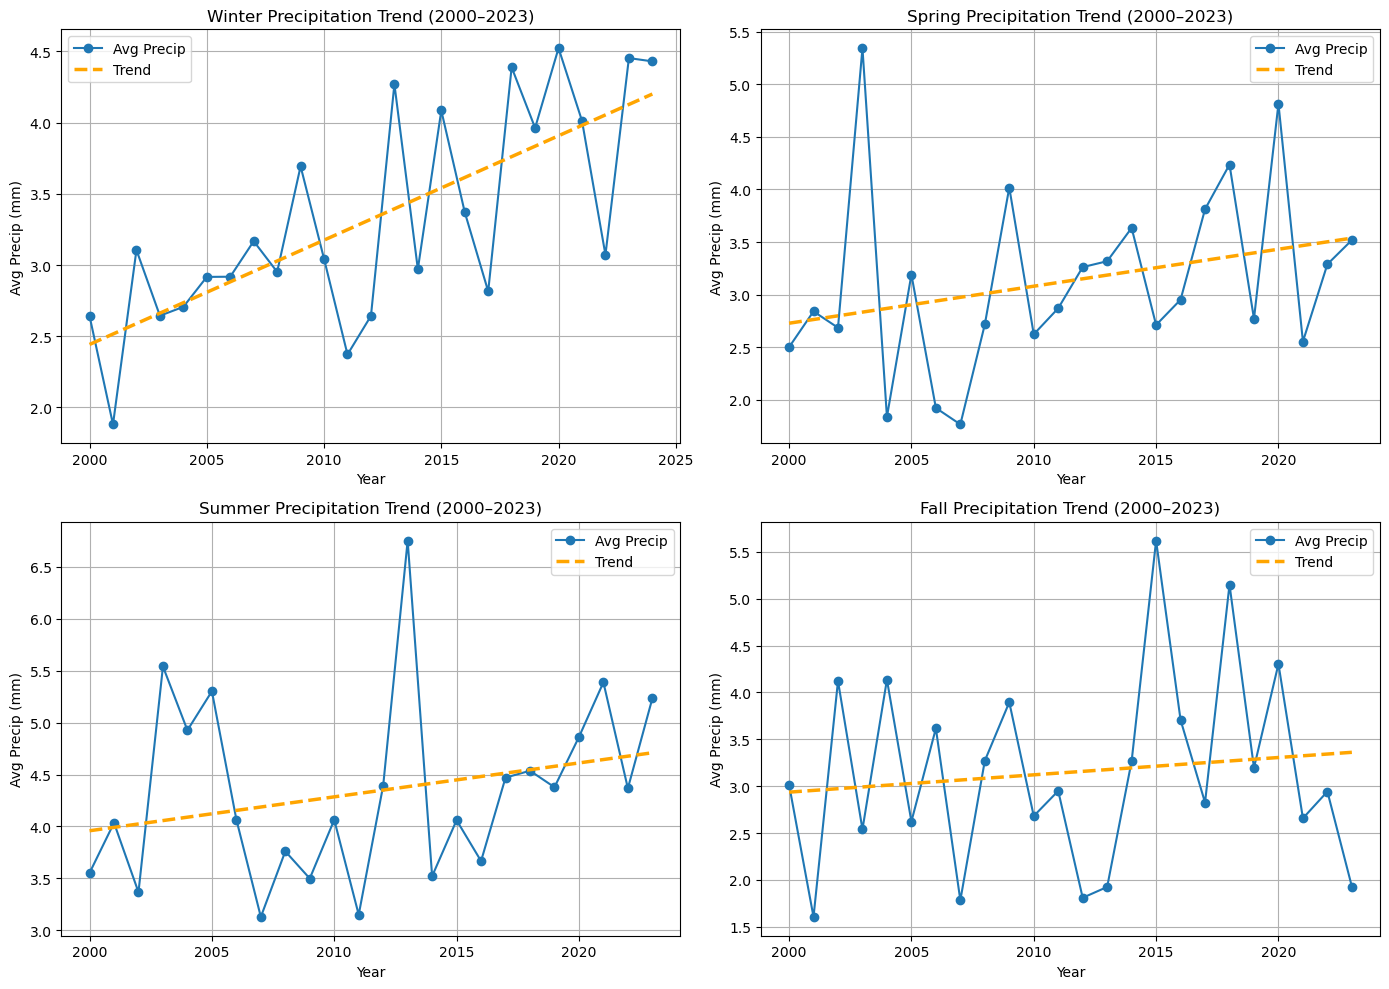

In [8]:
# Linear plots showing seasonal average precipitation trends from 2000–2023
seasonal_dfs = {
    'Winter': winter_df,
    'Spring': spring_df,
    'Summer': summer_df,
    'Fall': fall_df
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 layout for 4 seasons
axes = axes.flatten()

for idx, (season_name, df) in enumerate(seasonal_dfs.items()):
    seasonal_avg = df.groupby('Year')['pr(mm)'].mean()

    ax = axes[idx]
    
    ax.plot(seasonal_avg.index, seasonal_avg.values, marker='o', linestyle='-', label='Avg Precip')

    z = np.polyfit(seasonal_avg.index, seasonal_avg.values, 1)
    p = np.poly1d(z)
    ax.plot(seasonal_avg.index, p(seasonal_avg.index), linestyle='--', linewidth=2.5, color='orange', label='Trend')

    ax.set_xlabel("Year")
    ax.set_ylabel("Avg Precip (mm)")
    ax.set_title(f"{season_name} Precipitation Trend (2000–2023)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [9]:
# Show the first few rows of each season's data
print(winter_df.head())
print(spring_df.head())
print(summer_df.head())
print(fall_df.head())


   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      1    1     0.3      2.2     85.0     0.00735        64.0   
1  2000      1    2     0.0      3.4     89.4     0.00845       118.9   
2  2000      1    3     0.0      4.2     92.3     0.00844       149.3   
3  2000      1    4     4.2      4.1     95.5     0.00825        92.4   
4  2000      1    5     0.0      3.3    100.0     0.00355       161.0   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion  
0      1.9                            170              3  
1      2.7                            167              3  
2      3.1                            170              3  
3      5.9                            202              3  
4      4.2                            320              3  
   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      3    1     0.0      5.5    100.0     0.00769       230.2   
1  2000      3    2     0.0      6.3    100.0     0.00712    

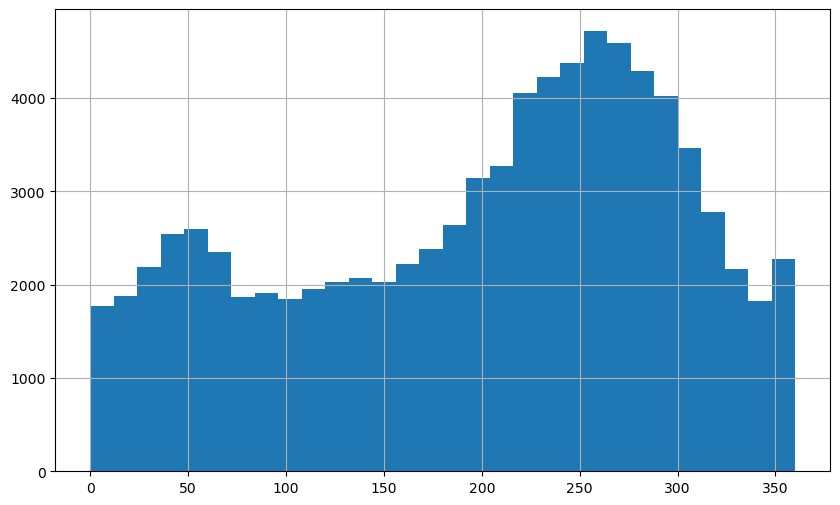

In [10]:
# Displaying histograms for various seasons' variables e.g.,winter wind direction 
seasonal_dfs = {
    'winter': winter_df,
    'spring': spring_df,
    'summer': summer_df,
    'fall': fall_df
}

wind_direction_hist = seasonal_dfs['winter']['th(DegreesClockwisefromnorth)']

plt.figure(figsize=(10,6))  
wind_direction_hist.hist(bins = 30)
plt.show()

In [11]:
# Display pearson correlation coefficient to visualize to find linear correlation btw variables 
pc = {}

seasonal_dfs = {
    'winter': winter_df,
    'spring': spring_df,
    'summer': summer_df,
    'fall': fall_df
}

for season, df in seasonal_dfs.items():
    pearson = df.corr(method='pearson', min_periods=1)
    pc[season] = pearson
    
print(pc['winter'])
print(pc['spring'])
print(pc['summer'])
print(pc['fall'])

                                       Year         Month           Day  \
Year                           1.000000e+00 -1.988179e-02  3.204981e-04   
Month                         -1.988179e-02  1.000000e+00  2.940625e-02   
Day                            3.204981e-04  2.940625e-02  1.000000e+00   
pr(mm)                         5.896936e-02  2.331752e-02  2.386088e-03   
etr(mm)                       -1.798138e-02 -2.047285e-01  5.670976e-02   
rmax(%)                        2.828975e-02  1.545821e-01 -7.243139e-03   
sph(kg/kg)                     1.384651e-01  1.256509e-01 -1.233957e-02   
srad(Wm-2)                    -2.771398e-02 -2.594399e-01  9.449970e-02   
vs(mps)                       -8.097078e-03 -5.662839e-02  2.087433e-02   
th(DegreesClockwisefromnorth) -5.990919e-02 -7.863518e-02 -2.471198e-02   
ClimateRegion                  3.476055e-14 -1.578674e-15 -2.028644e-15   

                                 pr(mm)   etr(mm)   rmax(%)  sph(kg/kg)  \
Year                    

### VIF analysis: Overall low multicollinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = ["etr(mm)", "rmax(%)", "sph(kg/kg)", "srad(Wm-2)", "vs(mps)", "th(DegreesClockwisefromnorth)"]


seasonal_dfs = {
    'winter': winter_df,
    'spring': spring_df,
    'summer': summer_df,
    'fall': fall_df
}


for season, df in seasonal_dfs.items():
    X = df[features]

    # Add a constant for VIF calculation
    X_with_const = add_constant(X)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    # Display VIF
    print(vif_data)


                         Feature        VIF
0                          const  62.892058
1                        etr(mm)   2.108000
2                        rmax(%)   1.703677
3                     sph(kg/kg)   1.875405
4                     srad(Wm-2)   1.840209
5                        vs(mps)   1.292555
6  th(DegreesClockwisefromnorth)   1.099355
                         Feature        VIF
0                          const  88.908079
1                        etr(mm)   3.169746
2                        rmax(%)   1.848294
3                     sph(kg/kg)   2.109072
4                     srad(Wm-2)   2.623754
5                        vs(mps)   1.362757
6  th(DegreesClockwisefromnorth)   1.088273
                         Feature         VIF
0                          const  425.877463
1                        etr(mm)    3.740327
2                        rmax(%)    1.646148
3                     sph(kg/kg)    1.363256
4                     srad(Wm-2)    3.004814
5                        v

#### Create CSV's for all seasons

In [14]:
# create a copy of the initial monthly dictionary so as not to interfere with it
seasonal_dfs_poly = seasonal_dfs.copy()# all seasons' data

# NOTE: Data was sorted by region, then date, due to the spatial and temporal dependencies.
# Creating lag and rolling features became an issue due to the Climate Region column
for season, df in seasonal_dfs_poly.items():
    # Create 'Date' column
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Sort by 'Date'
    df = df.sort_values(by='Date')
    
    # Drop 'Date' column
    df = df.drop(columns='Date')
    
    # Drop rows where Year == 2024
    df = df[df['Year'] != 2024]
    
    # Save to CSV
    df.to_csv(f"C:/Users/ngangaa/Documents/Classification_csvs_saved_here/ordered_season{season}.csv", index=False)
    
    # new updated dictionary containing all seasons' data 
    seasonal_dfs_poly[season] = df


In [15]:
# Reset index for each season
for season, df in seasonal_dfs_poly.items():
    seasonal_dfs_poly[season] = df.reset_index(drop=True)

print(seasonal_dfs_poly['winter'].head()) 
print(seasonal_dfs_poly['spring'].head()) 
print(seasonal_dfs_poly['summer'].head()) 
print(seasonal_dfs_poly['fall'].head()) 



   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      1    1     0.3      2.2     85.0     0.00735        64.0   
1  2000      1    1     0.0      2.4     90.8     0.00655        69.8   
2  2000      1    1     0.0      2.0     78.6     0.00552        82.8   
3  2000      1    1     0.0      2.0     81.4     0.00684        99.9   
4  2000      1    1     0.0      1.7     80.4     0.00615        74.1   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion  
0      1.9                            170              3  
1      3.4                            221              1  
2      1.9                            153              2  
3      1.5                            209              3  
4      1.7                            185              1  
   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      3    1     0.0      5.5    100.0     0.00769       230.2   
1  2000      3    1     0.0      6.4     81.9     0.00633    

# Model training and validation 

### Random Forest Classification; default hyperparameters  

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# for each season
for season, df in seasonal_dfs_poly.items():
    # Sort the season's data in chronological order
    df = df.sort_values(by=['Year', 'Month', 'Day']).reset_index(drop=True)

    # create new binary column called 'rain'
    
    # if ['pr(mm)'] > 0, assign 1. it rained. Convert to binary /1 integers
    df['rain'] = (df['pr(mm)'] > 0).astype(int)

    # store the updated df back into the dictionary
    seasonal_dfs_poly[season] = df

#seasonal_dfs_poly['fall']

# print the count of rain/ no rain values in the fall df
print(seasonal_dfs_poly['fall']['rain'].value_counts())

rain
0    58238
1    24754
Name: count, dtype: int64


In [17]:
dfw.to_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/winter_binary.csv")
dfsp.to_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/spring_binary.csv")
dfsu.to_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/summer_binary.csv")
dff.to_csv("C:/Users/ngangaa/Documents/Classification_csvs_saved_here/fall_binary.csv")


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

# Uses the same train/ test split method as the regression file. 
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

    
def walk_forward_once(precip_series, training_window, forecast_horizon
    # evaluation metrics used for classification modeling.                 
    accuracies = []
    precisions = []
    recalls = []
    # The F1 binary score is the default harmonic mean of the precision and recall
    # The other F1 score types are macro-F1 (unweighted average of per-class scores) and 
    # the weighted F1 score (gives more influence to classes with MORE samples)
    f1_binary = [] 
    

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # Drop target and irrelevant columns
        X_train = training_data.drop(columns=['pr(mm)', 'Date', 'rain'], errors='ignore')
        X_test = testing_data.drop(columns=['pr(mm)', 'Date', 'rain'], errors='ignore')
        y_train = training_data['rain']
        y_test = testing_data['rain']

        # One-hot encode categorical features
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Train and predict
        # class weight = balanced addresses the imbalance in the precipitation column
        rfmodel = RandomForestClassifier(random_state=42, class_weight='balanced')
        rfmodel.fit(X_train, y_train)
        y_pred = rfmodel.predict(X_test)

        # Metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
        recalls.append(recall_score(y_test, y_pred, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred, average='binary'))    


    return accuracies, precisions, recalls, f1_binary


def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
  
    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            accuracies, precisions, recalls, f1_binary= walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
            "fold_size": fold_size,
            "split": f"{num}/{denom}-{denom-num}/{denom}",
            "train_size": train_size,
            "test_size": test_size,
            "Average Accuracy": np.mean(accuracies),
            "Average Precision": np.mean(precisions),
            "Average Recall": np.mean(recalls),
            "Average F1 (Binary)": np.mean(f1_binary)
            })

    return pd.DataFrame(results)


# Dictionary to store results for each season
seasonal_results = {}
best_configs = {}

for season_idx in ['winter','spring','summer','fall']:  # seasons 1–4
    results_df = nested_walk_forward(seasonal_dfs_poly[season_idx], 
                                    fold_sizes=[ 5, 7,10],
                                    partition_ratios=[(2,3), (3,4), (4,5), (5,6)])
    seasonal_results[season_idx] = results_df
    
    #Outputs all metrics, but F1 is the criterion for choosing which row is “best” since it balances precision & recall.
    best_config = results_df.loc[results_df['Average F1 (Binary)'].idxmax()]
    best_configs[season_idx] = best_config
    print(f"Best configuration for season {season_idx}:")
    print(best_config)




Best configuration for season winter:
fold_size                     5
split                   5/6-1/6
train_size                13717
test_size                  2744
Average Accuracy       0.798409
Average Precision      0.740981
Average Recall         0.646176
Average F1 (Binary)    0.686142
Name: 3, dtype: object
Best configuration for season spring:
fold_size                     7
split                   3/4-1/4
train_size                 8989
test_size                  2997
Average Accuracy       0.798993
Average Precision      0.747397
Average Recall         0.611068
Average F1 (Binary)    0.667289
Name: 5, dtype: object
Best configuration for season summer:
fold_size                     7
split                   2/3-1/3
train_size                 7990
test_size                  3996
Average Accuracy       0.719108
Average Precision       0.70924
Average Recall         0.754381
Average F1 (Binary)    0.726318
Name: 4, dtype: object
Best configuration for season fall:
fold_size    

### Compare monthly performance with seasonal performance. 
### Conclusion: Monthly performance was better

### Add binary target to monthly datasets 

In [4]:
# read in the monthly files
import pandas as pd

# Dictionary to hold all monthly dataframes
monthly_dfs = {}

# read in all monthly datasets
for i in range(1, 13): 
    filepath = f"C:/Users/ngangaa/Documents/Regression_csvs_saved_here/poly_order_MONTH{i}.csv"
    monthly_dfs[i] = pd.read_csv(filepath)

# Access month 1 dataframe
print(monthly_dfs[1].tail())


       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion        Date  
28267      2.3                            181              4  2023-01-31  
28268      2.0                            182              4  2023-01-31  
28269      2.1                            187              4  2023-01-31  
28270      1.5                            175              4  2023-01-31  
28271      2.2                            184              4  2023-01-31  


In [5]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Sort each df's values by climate region then time. 
for month, df in monthly_dfs.items():
    df = df.sort_values(["ClimateRegion", "Year", "Month", "Day"]).reset_index(drop=True)
    # create column for future reference
    df["Date"] = pd.to_datetime(df[["Year","Month","Day"]])
    
    df['precip'] = (df['pr(mm)'] > 0).astype(int)
    
    monthly_dfs[month] = df

monthly_dfs[1]

,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),ClimateRegion,Date,precip
0,2000,1,1,0.0,2.0,80.5,0.00646,59.5,2.0,178,1,2000-01-01,0
1,2000,1,1,0.0,1.7,88.5,0.00651,61.5,1.8,180,1,2000-01-01,0
2,2000,1,1,0.0,2.8,93.8,0.00577,72.9,4.6,194,1,2000-01-01,0
3,2000,1,1,0.0,2.4,90.8,0.00655,69.8,3.4,221,1,2000-01-01,0
4,2000,1,1,0.0,1.7,80.4,0.00615,74.1,1.7,185,1,2000-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2023,1,31,0.7,2.8,67.4,0.00678,71.0,2.3,181,4,2023-01-31,1
28268,2023,1,31,0.0,2.4,72.4,0.00730,76.9,2.0,182,4,2023-01-31,0
28269,2023,1,31,0.0,2.3,76.8,0.00779,70.8,2.1,187,4,2023-01-31,0
28270,2023,1,31,0.8,1.9,66.9,0.00661,46.9,1.5,175,4,2023-01-31,1


### Random Forest Classification; default hyperparameters

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
def walk_forward_once(precip_series, training_window, forecast_horizon):
    accuracies = []
    precisions = []
    recalls = []
    f1_binary = []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # Drop target and irrelevant columns
        X_train = training_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = testing_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = training_data['precip']
        y_test = testing_data['precip']

        # One-hot encode categorical features
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Train and predict
        rfmodel = RandomForestClassifier(random_state=42, class_weight='balanced')
        rfmodel.fit(X_train, y_train)
        y_pred = rfmodel.predict(X_test)

        # Metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
        recalls.append(recall_score(y_test, y_pred, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred, average="binary"))

    return accuracies, precisions, recalls, f1_binary


def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
 
    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            accuracies, precisions, recalls, f1_binary= walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "Average Accuracy": np.mean(accuracies),
                "Average Precision": np.mean(precisions),
                "Average Recall": np.mean(recalls),
                "Average F1 (Binary)": np.mean(f1_binary)
            })

    return pd.DataFrame(results)


# Dictionary to store results for each season
monthly_results = {}
best_configs = {}

for month_idx in range(1, 13): 
    results_df = nested_walk_forward(monthly_dfs[month_idx], fold_sizes=[3,5,10])
    monthly_results[month_idx] = results_df
    
    #Outputs all metrics, but F1 is the criterion for choosing which row is “best” since it balances precision & recall.
    best_config = results_df.loc[results_df['Average F1 (Binary)'].idxmax()]
    best_configs[month_idx] = best_config
    print(f"Best configuration for month {month_idx}:")
    print(best_config)



Best configuration for month 1:
fold_size                     3
split                   5/6-1/6
train_size                 7853
test_size                  1571
Average Accuracy       0.822565
Average Precision      0.786425
Average Recall         0.660496
Average F1 (Binary)    0.713367
Name: 3, dtype: object
Best configuration for month 2:
fold_size                     3
split                   3/4-1/4
train_size                 6441
test_size                  2147
Average Accuracy        0.78697
Average Precision      0.733677
Average Recall         0.656351
Average F1 (Binary)    0.688992
Name: 1, dtype: object
Best configuration for month 3:
fold_size                     3
split                   7/8-1/8
train_size                 8246
test_size                  1178
Average Accuracy       0.802472
Average Precision      0.760383
Average Recall         0.603467
Average F1 (Binary)    0.663782
Name: 5, dtype: object
Best configuration for month 4:
fold_size                     3
spl

### The code below investigates RF performance after including lag_1 features & rolling averages

#### default hyperparematers : default features + lag_1

In [6]:

lag1_monthly= {}

for month, df in monthly_dfs.items():
    lag1_monthly[month] = df.copy()
print(lag1_monthly[1])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in lag1_monthly.items(): 
    for feature in main_features:
        df[f'{feature}_lag1'] = df.groupby("ClimateRegion")[feature].shift(1)
        df[f'{feature}_lag1'] = df[f'{feature}_lag1'].fillna(df[f'{feature}_lag1'].mean())
    lag1_monthly[month]= df
print(lag1_monthly[1])
    

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  \


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_configs_rf = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 4377, 'test_size': 1095},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2355, 'test_size': 472},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

# Walk-forward with classification metrics
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        # Split data btw features & target
        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        # One-hot encode categorical feature
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # RF classifier model
        rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
        rf_model.fit(X_train, y_train)

        # Predictions
        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        # Classification evaluation metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
# results for each month
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_rf(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_rf[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.833, Precision=0.785, Recall=0.663, F1=0.717

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.819, Precision=0.775, Recall=0.684, F1=0.723

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=1.000, Accuracy Test=0.821, Precision=0.771, Recall=0.641, F1=0.695

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.834, Precision=0.777, Recall=0.627, F1=0.689

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=1.000, Accuracy Test=0.781, Precision=0.715, Recall=0.620, F1=0.663

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.747, Precision=0.729, Recall=0.729, F1=0.726

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.720, Precision=0.718, Recall=0.783, F1=0.747

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=1.000, Accur

#### default hyperparematers : default features + lag_1 +rolling_7


In [13]:

rolling7_monthly= {}

# monthly_dfs_poly is already defined as the monthly datasets 
for month, df in lag1_monthly.items():
    rolling7_monthly[month] = df.copy()
    # at this point, this contains only lag1 +rolling7 values
print(rolling7_monthly[1])
    

main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in rolling7_monthly.items(): # january 
    for feature in main_features: # 'etr(mm)'
        df[f'{feature}_rolling7'] = df.groupby("ClimateRegion")[feature].transform(lambda x: x.shift(1).rolling(7).mean())
        df[f'{feature}_rolling7'] = df[f'{feature}_rolling7'].fillna(df[f'{feature}_rolling7'].mean())
   # monthly_expanded_var[month].to_csv(f"C:/Users/ngangaa/Documents/Regression_csvs_saved_here/monthly_expanded_var{month}.csv", index =False)
    rolling7_monthly[month]= df
print(rolling7_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  \


In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 4377, 'test_size': 1095},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2355, 'test_size': 472},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

# Walk-forward with classification metrics
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        # Features / target
        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # <-- binary/class label column
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        # One-hot encode categoricals
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Model
        rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
        rf_model.fit(X_train, y_train)

        # Predictions
        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        # Metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
# Run month by month
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_rf(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_rf[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.831, Precision=0.787, Recall=0.649, F1=0.709

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.814, Precision=0.772, Recall=0.669, F1=0.713

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=1.000, Accuracy Test=0.818, Precision=0.774, Recall=0.622, F1=0.685

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.832, Precision=0.774, Recall=0.619, F1=0.685

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=1.000, Accuracy Test=0.782, Precision=0.715, Recall=0.623, F1=0.664

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.751, Precision=0.733, Recall=0.729, F1=0.729

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.721, Precision=0.721, Recall=0.776, F1=0.745

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=1.000, Accur

#### default hyperparematers : default features + lag_1 + rolling_7 + rolling_14


In [15]:
rolling14_monthly= {}

for month, df in rolling7_monthly.items():
    rolling14_monthly[month] = df.copy()
print(rolling14_monthly[1])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in rolling14_monthly.items(): 
    for feature in main_features:
        df[f'{feature}_rolling14'] = df.groupby("ClimateRegion")[feature].transform(lambda x: x.shift(1).rolling(14).mean())
        df[f'{feature}_rolling14'] = df[f'{feature}_rolling14'].fillna(df[f'{feature}_rolling14'].mean())
    rolling14_monthly[month]= df
print(rolling14_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ...  etr(mm)_lag1 rmax(%)_la

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_configs_rf = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 4377, 'test_size': 1095},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2355, 'test_size': 472},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip'] 
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_rf(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_rf[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.828, Precision=0.786, Recall=0.637, F1=0.702

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.810, Precision=0.767, Recall=0.660, F1=0.705

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=1.000, Accuracy Test=0.819, Precision=0.777, Recall=0.623, F1=0.686

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.833, Precision=0.772, Recall=0.622, F1=0.687

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=1.000, Accuracy Test=0.776, Precision=0.705, Recall=0.617, F1=0.657

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.750, Precision=0.732, Recall=0.729, F1=0.728

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.717, Precision=0.718, Recall=0.771, F1=0.740

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=1.000, Accur

#### default hyperparematers : default features + lag_1 + rolling_7 + rolling_14 + rolling_28


In [17]:
rolling28_monthly= {}

for month, df in rolling14_monthly.items():
    rolling28_monthly[month] = df.copy()
print(rolling28_monthly[1])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in rolling28_monthly.items():
    for feature in main_features:
        df[f'{feature}_rolling28'] = df.groupby("ClimateRegion")[feature].transform(lambda x: x.shift(1).rolling(28).mean())
        df[f'{feature}_rolling28'] = df[f'{feature}_rolling28'].fillna(df[f'{feature}_rolling28'].mean())
    rolling28_monthly[month]= df
print(rolling28_monthly[1])

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ...  etr(mm)_rolling7  \
0  

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# dictionary containing best rf train/test sizes; default parameters
best_configs_rf = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 4377, 'test_size': 1095},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2355, 'test_size': 472},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

# Walk-forward with classification metrics
def walk_forward_once_rf(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        # Features / target
        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # <-- binary/class label column
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        # One-hot encode categoricals
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Model
        rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
        rf_model.fit(X_train, y_train)

        # Predictions
        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        # Metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
# Run month by month
monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_rf[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_rf(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_rf[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.826, Precision=0.782, Recall=0.633, F1=0.698

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.814, Precision=0.774, Recall=0.663, F1=0.710

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=1.000, Accuracy Test=0.817, Precision=0.773, Recall=0.616, F1=0.681

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.831, Precision=0.770, Recall=0.617, F1=0.682

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=1.000, Accuracy Test=0.779, Precision=0.711, Recall=0.619, F1=0.660

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.750, Precision=0.732, Recall=0.730, F1=0.728

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.718, Precision=0.722, Recall=0.765, F1=0.740

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=1.000, Accur

## Conclusion: Including lag_1 features improved performance slightly. 

### RF Hyperparameter tuning: 
#### n_estimators, 
#### max_depth ,
#### min_samples_split, 
#### min_samples_leaf,
#### max_features

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary of optimal train/test sizes
rf_best_configs_monthly = {
    1: {'train_size': 7853, 'test_size': 1571},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 6282, 'test_size': 3142},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 6840, 'test_size': 2280},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 8077, 'test_size': 1347},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2355, 'test_size': 472},
}


# Hyperparameter grid to test over 
# The n_estimators was limited to a max of 750 due to high run-time
param_dist = {
    'n_estimators': [100, 200, 500, 750],
    'max_depth': [5, 10, 15, 20, None],  # None means unlimited depth
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
    'max_features':  ['sqrt', 'log2', 0.5, 0.8]
}

best_params_per_month_rf = {}

# The cv = tscv method is the only option for RandomizedSearchCV with time series data
tscv = TimeSeriesSplit(n_splits=5)

for month_idx in range(1, 13):
    print(f"\n Hyperparameter tuning for month {month_idx}...")
    df = lag1_monthly[month_idx]

    # Define features and target
    X = df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
    y = df['precip']

    # One-hot encode
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    # Grid search
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=50, # reduce no. of combinations to 50 due to run time memory issue
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        scoring='f1',  # most fair scoring metric as it balances precision and recall
        random_state=42
    )

    # run the randomized hyperparameter search using input features X & y
    random_search.fit(X, y)
    
    # store the best hyperparameter combination found during randomized search
    best_params_per_month_rf[month_idx] = random_search.best_params_
    
    print(f"Month {month_idx} best params: {random_search.best_params_}")

    
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

def walk_forward_once_rf(precip_series, training_window, forecast_horizon,best_params):
    accuracies_train, accuracies_test = [], [] 
    precisions, recalls, f1s = [], [], [] 

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon): 
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon) 
     

        # Drop target and irrelevant columns
        X_train = training_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = testing_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = training_data['precip']
        y_test = testing_data['precip']

        # One-hot encode categorical features
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Train and predict
        rfmodel = RandomForestClassifier(
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            min_samples_split=best_params['min_samples_split'],
            min_samples_leaf=best_params['min_samples_leaf'],
            max_features=best_params['max_features'],
            random_state=42)

        rfmodel.fit(X_train, y_train)
         
        # Predictions 
        y_pred_train = rfmodel.predict(X_train) 
        y_pred_test = rfmodel.predict(X_test) 
     
        # evaluation metrics 
        accuracies_train.append(accuracy_score(y_train, y_pred_train)) 
        accuracies_test.append(accuracy_score(y_test, y_pred_test)) 
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0)) 
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0)) 
        f1s.append(f1_score(y_test, y_pred_test, average='binary')) 
     
    return accuracies_train,accuracies_test,precisions,recalls,f1s 

monthly_results_rf = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = rf_best_configs_monthly[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_rf(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_rf[month_idx]
    )
    
    monthly_results_rf[month_idx] ={  
    'Average Accuracy Train': np.mean(acc_train),  
    'Average Accuracy Test': np.mean(acc_test), 
    'Average Precision': np.mean(prec),  
    'Average Recall': np.mean(rec), 
    'Average F1 (Binary)': np.mean(f1)  
    } 
    
    print(f"Month {month_idx}: " 
      f"Accuracy Train={np.mean(acc_train):.3f}, "  
      f"Accuracy Test={np.mean(acc_test):.3f}, "  
      f"Precision={np.mean(prec):.3f}, " 
      f"Recall={np.mean(rec):.3f}, "  
      f"F1={np.mean(f1):.3f}") 



 Hyperparameter tuning for month 1...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Month 1 best params: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 15}

 Hyperparameter tuning for month 2...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Month 2 best params: {'n_estimators': 750, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 0.8, 'max_depth': 15}

 Hyperparameter tuning for month 3...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Month 3 best params: {'n_estimators': 750, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 20}

 Hyperparameter tuning for month 4...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Month 4 best params: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 15}

 Hyperparameter tuning for month 5...
Fitting 5 folds for each of 50 candidates

### XGBoost Classification; default hyperparameters 

In [77]:
from xgboost import XGBClassifier
from collections import Counter 

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
def walk_forward_once(precip_series, training_window, forecast_horizon):
    accuracies, precisions, recalls, f1_binary = [], [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        # Drop target and irrelevant columns
        X_train = training_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = testing_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = training_data['precip']
        y_test = testing_data['precip']

        # One-hot encode categorical features
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Handle class imbalance; XGBoost doesn't have class weight = balanced

        # 'Counter' counts how many samples belong to each precip class(0/1)
        counter = Counter(y_train)
        
        # If there are no minority class samples, assign a default ratio of 1.0
        # Otherwise, if there are both classes present in the training data, calculate the imbalance ratio.
        # class imbalance ratio is calculated by count of class 0/ count of class 1. This is later used to set class_weight in  the XGBoost model

        if counter[1] == 0:
            estimate = 1.0
            
        else:
            estimate = counter[0] / counter[1]

        # Train and predict with XGBoost
        # The 'logloss' evaluation metric is standard for binary classification.
        # scale_pos_weight is a multiplier applied to the positive class. Used for binary classification
        xgbmodel = XGBClassifier(
            eval_metric='logloss',
            scale_pos_weight=estimate,
            random_state=42
        )
        xgbmodel.fit(X_train, y_train)
        y_pred = xgbmodel.predict(X_test)

        # Metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
        recalls.append(recall_score(y_test, y_pred, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred, average="binary"))

    return accuracies, precisions, recalls, f1_binary


def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    
    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            accuracies, precisions, recalls, f1_binary= walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "Average Accuracy": np.mean(accuracies),
                "Average Precision": np.mean(precisions),
                "Average Recall": np.mean(recalls),
                "Average F1 (Binary)": np.mean(f1_binary)
            })

    return pd.DataFrame(results)


# Dictionary to store results for each season
monthly_results = {}
best_configs = {}

for month_idx in range(1, 13):  # for each month
    results_df = nested_walk_forward(monthly_dfs[month_idx], fold_sizes=[3,5,10])
    monthly_results[month_idx] = results_df
    # F1 is the criterion for choosing which row is “best.”
    best_config = results_df.loc[results_df['Average F1 (Binary)'].idxmax()]
    best_configs[month_idx] = best_config
    print(f"Best configuration for month {month_idx}:")
    print(best_config)


Best configuration for month 1:
fold_size                     3
split                   4/5-1/5
train_size                 7539
test_size                  1885
Average Accuracy       0.805729
Average Precision      0.715647
Average Recall         0.725403
Average F1 (Binary)    0.716517
Name: 2, dtype: object
Best configuration for month 2:
fold_size                     5
split                   2/3-1/3
train_size                 3434
test_size                  1718
Average Accuracy       0.755336
Average Precision      0.670152
Average Recall         0.710762
Average F1 (Binary)    0.682192
Name: 6, dtype: object
Best configuration for month 3:
fold_size                     3
split                   7/8-1/8
train_size                 8246
test_size                  1178
Average Accuracy       0.773716
Average Precision      0.666335
Average Recall         0.667535
Average F1 (Binary)    0.656039
Name: 5, dtype: object
Best configuration for month 4:
fold_size                     5
spl

### The code below investigates XGBoost performance after including lag_1 features & rolling averages

### XGBoost default hyperparameters: default features + lag1

In [28]:
from xgboost import XGBClassifier

from collections import Counter
# dictionary containing best rf train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 3648, 'test_size': 1824},
    5: {'train_size': 8246, 'test_size': 1178},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7980, 'test_size': 1140},
    12: {'train_size': 2355, 'test_size': 472},
}

  
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward with classification metrics
def walk_forward_once_xg(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        # Features / target
        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        # One-hot encode categoricals
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        counter = Counter(y_train) 
        if counter[1] == 0: 
            estimate = 1.0 
        else: 
            estimate = counter[0] / counter[1] 
         
        # Train and predict with XGBoost 
        xgb_model = XGBClassifier( 
            eval_metric='logloss', 
            scale_pos_weight=estimate, 
            random_state=42 
        ) 
        xgb_model.fit(X_train, y_train) 

        # Predictions
        y_pred_train = xgb_model.predict(X_train)
        y_pred_test = xgb_model.predict(X_test)

        # Metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
# Run month by month
monthly_results_xg = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_xg(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_xg[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")

#ties with rolling below, so no need to overcomplicate para apace. and this lag1 won based on recal power


Walk-forward evaluation for month 1...
Month 1: Accuracy Train=0.997, Accuracy Test=0.830, Precision=0.744, Recall=0.727, F1=0.733

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.752, Precision=0.657, Recall=0.703, F1=0.671

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.995, Accuracy Test=0.823, Precision=0.721, Recall=0.749, F1=0.732

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.791, Precision=0.657, Recall=0.668, F1=0.660

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.985, Accuracy Test=0.786, Precision=0.680, Recall=0.719, F1=0.697

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=0.999, Accuracy Test=0.719, Precision=0.693, Recall=0.710, F1=0.692

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=0.997, Accuracy Test=0.689, Precision=0.701, Recall=0.722, F1=0.708

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.975, Accur

### XGBoost default hyperparameters: default features + lag1 + rolling7

In [29]:
from collections import Counter
# dictionary containing best rf train/test sizes; default parameters
best_configs_xg = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 3648, 'test_size': 1824},
    5: {'train_size': 8246, 'test_size': 1178},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7980, 'test_size': 1140},
    12: {'train_size': 2355, 'test_size': 472},
}

  
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward with classification metrics
def walk_forward_once_xg(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        # Features / target
        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # <-- binary/class label column
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        # One-hot encode categoricals
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        counter = Counter(y_train) 
        if counter[1] == 0: 
            estimate = 1.0 
        else: 
            estimate = counter[0] / counter[1] 
         
        # Train and predict with XGBoost 
        xgb_model = XGBClassifier( 
            eval_metric='logloss', 
            scale_pos_weight=estimate, 
            random_state=42 
        ) 
        xgb_model.fit(X_train, y_train) 

        # Predictions
        y_pred_train = xgb_model.predict(X_train)
        y_pred_test = xgb_model.predict(X_test)

        # Metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
# Run month by month
monthly_results_xg = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_xg(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_xg[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=0.999, Accuracy Test=0.825, Precision=0.740, Recall=0.707, F1=0.721

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.760, Precision=0.664, Recall=0.710, F1=0.679

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.998, Accuracy Test=0.821, Precision=0.723, Recall=0.735, F1=0.725

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.792, Precision=0.656, Recall=0.672, F1=0.662

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.992, Accuracy Test=0.782, Precision=0.675, Recall=0.710, F1=0.690

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.719, Precision=0.691, Recall=0.724, F1=0.703

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.696, Precision=0.710, Recall=0.723, F1=0.714

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.985, Accur

### XGBoost default hyperparameters: default features + lag1 + rolling7+rolling14

In [30]:
from collections import Counter
best_configs_xg = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 3648, 'test_size': 1824},
    5: {'train_size': 8246, 'test_size': 1178},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7980, 'test_size': 1140},
    12: {'train_size': 2355, 'test_size': 472},
}

  
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward with classification metrics
def walk_forward_once_xg(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # <-- binary/class label column
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        counter = Counter(y_train) 
        if counter[1] == 0: 
            estimate = 1.0 
        else: 
            estimate = counter[0] / counter[1] 
         
        # Train and predict with XGBoost model
        xgb_model = XGBClassifier( 
            eval_metric='logloss', 
            scale_pos_weight=estimate, 
            random_state=42 
        ) 
        xgb_model.fit(X_train, y_train) 

        # Predictions
        y_pred_train = xgb_model.predict(X_train)
        y_pred_test = xgb_model.predict(X_test)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_xg = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_xg(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_xg[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.824, Precision=0.738, Recall=0.710, F1=0.722

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.763, Precision=0.670, Recall=0.702, F1=0.679

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.999, Accuracy Test=0.822, Precision=0.728, Recall=0.724, F1=0.723

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.794, Precision=0.660, Recall=0.671, F1=0.663

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.995, Accuracy Test=0.781, Precision=0.676, Recall=0.709, F1=0.690

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.727, Precision=0.698, Recall=0.731, F1=0.712

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.692, Precision=0.706, Recall=0.724, F1=0.711

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.992, Accur

### XGBoost default hyperparameters: default features + lag1 + rolling7+rolling14+rolling28

In [31]:
from collections import Counter
best_configs_xg = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 3648, 'test_size': 1824},
    5: {'train_size': 8246, 'test_size': 1178},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7980, 'test_size': 1140},
    12: {'train_size': 2355, 'test_size': 472},
}

  
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

# Walk-forward with classification metrics
def walk_forward_once_xg(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # <-- binary/class label column
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        counter = Counter(y_train) 
        if counter[1] == 0: 
            estimate = 1.0 
        else: 
            estimate = counter[0] / counter[1] 
         
        xgb_model = XGBClassifier( 
            eval_metric='logloss', 
            scale_pos_weight=estimate, 
            random_state=42 
        ) 
        xgb_model.fit(X_train, y_train) 

        y_pred_train = xgb_model.predict(X_train)
        y_pred_test = xgb_model.predict(X_test)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_xg = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_xg(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_xg[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")




Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.824, Precision=0.740, Recall=0.706, F1=0.721

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.764, Precision=0.674, Recall=0.689, F1=0.676

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.999, Accuracy Test=0.817, Precision=0.718, Recall=0.722, F1=0.717

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=1.000, Accuracy Test=0.795, Precision=0.664, Recall=0.664, F1=0.662

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.997, Accuracy Test=0.775, Precision=0.666, Recall=0.700, F1=0.681

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=1.000, Accuracy Test=0.727, Precision=0.705, Recall=0.714, F1=0.707

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=1.000, Accuracy Test=0.698, Precision=0.714, Recall=0.723, F1=0.715

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.994, Accur

## Conclusion: Including lag_1 features improved performance slightly. 

### XGBoost hyperparameter tuning

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

binary_xgb_best_configs_monthly = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 7539, 'test_size': 1885},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 2473, 'test_size': 354},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2120, 'test_size': 707},
}

# Hyperparameter search space; randomized search will sample combinations
binary_param_grid = {
    'n_estimators': [150, 250, 500, 750],
    'max_depth': [4, 6, 9],
    'learning_rate': [0.01, 0.03, 0.07, 0.15, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.6],
    'gamma': [0, 0.1, 1, 2, 4, 7, 9],
    'reg_alpha': [0.01, 0.1, 0.7, 1, 3, 5, 7],
    'scale_pos_weight': [1, 1.5, 1.9, 2, 5, 10]
}

# split data into 3 sequential folds
tscv = TimeSeriesSplit(n_splits=5)

# will contain the hyperparameter values that yielded the best performance. 
binary_best_params= {}

# For each month
for month_idx in range(1, 13):
    print(f"\n Hyperparameter tuning for month {month_idx}...")
    
    df = lag1_monthly[month_idx]

    # Separate features/target
    X = df.drop(columns=['pr(mm)', 'Date','precip'], errors='ignore')
    y = df['precip']

    # One-hot encode categorical features 
    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')
    
    counter = Counter(y) 
    if counter[1] == 0: 
        estimate = 1.0 
    else: 
        estimate = counter[0] / counter[1] 
        
    # create the model
    binary_xgb = XGBClassifier(objective='binary:logistic', scale_pos_weight=estimate, eval_metric='logloss', random_state=42)

    # define the randomized search. Uses xgb model. 50 iterations, optimized for F1 score as it's the most unbiased metric
    random_search = RandomizedSearchCV(
        estimator=binary_xgb,
        param_distributions=binary_param_grid,
        n_iter=60,
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        scoring='f1',
        random_state=42
    )
    
    random_search.fit(X, y)
    
    # outputs the set of hyperparameters that achieved the best score
    binary_best_params[month_idx] = random_search.best_params_
    binary_best_params[month_idx] = random_search.best_params_
    print(f"Month {month_idx} best params: {binary_best_params[month_idx]}")

# Split the data into train/test windows 
def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data

def walk_forward_once_xgb(precip_series, training_window, forecast_horizon, best_params):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1_binary = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        # create a training and test set
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        # define features and target
        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']
        y_test = test_df['precip']

        # One-hot encode categorical climate region feature
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Train XGBoost with tuned hyperparameters 
        # best_params contains the best performing hyperparameters
        binary_model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        gamma=best_params['gamma'],
        reg_alpha=best_params['reg_alpha'],
        scale_pos_weight=best_params['scale_pos_weight']
        )


        # train the model using training data
        binary_model.fit(X_train, y_train)

        # Make predictions on the train and test set
        y_pred_train = binary_model.predict(X_train)
        y_pred_test = binary_model.predict(X_test)

        # Metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train, accuracies_test, precisions, recalls, f1_binary

monthly_results_xg = {}
for month_idx in range(1, 13):
    print(f"\n Walk-forward evaluation for month {month_idx}...")
    config =  binary_xgb_best_configs_monthly[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']
    
    # Walk-forward evaluation
    print(f"Walk-forward evaluation for month {month_idx}...")

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_xgb(
    lag1_monthly[month_idx],
    training_window=train_size,
    forecast_horizon=test_size,
    best_params=binary_best_params[month_idx]
    )


    # This dictionary contains each month's evaluation metrics & the best performing hyperparameters 
    monthly_results_xg[month_idx] = {
        'Average Accuracy Train': np.mean(acc_train),
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec),
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1),
        'Best Params': binary_best_params[month_idx]
    }

    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, "
          f"Accuracy Test={np.mean(acc_test):.3f}, "
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, "
          f"F1={np.mean(f1):.3f}")



 Hyperparameter tuning for month 1...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 1 best params: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_alpha': 0.7, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.5}

 Hyperparameter tuning for month 2...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 2 best params: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_alpha': 0.7, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.5}

 Hyperparameter tuning for month 3...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 3 best params: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_alpha': 0.7, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.5}

 Hyperparameter tuning for month 4...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 4 best params: {'subsample': 0.9, 'scale_pos_weigh

# Run XGBoost Classifier model on 2024 data

In [12]:
import pandas as pd
# Read in monthly files
monthly_2024 = {}

for i in range(1, 13):
    filepath = fr"C:\Users\ngangaa\Documents\Classification_csvs_saved_here\2024_files\month_{i}.csv"
    df = pd.read_csv(filepath)
    
    # Sort chronologically by region
    df = df.sort_values(["ClimateRegion", "Year", "Month", "Day"]).reset_index(drop=True)
    
    # Create Date column
    df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])
    
    # Binary precip column
    df['precip'] = (df['pr(mm)'] > 0).astype(int)
    
    monthly_2024[i] = df

# Create lag1 features since they enhance the performance of the XGBoost Classifier. 
lag1_2024 = {}
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in monthly_2024.items():
    for feature in main_features:
        df[f'{feature}_lag1'] = df.groupby("ClimateRegion")[feature].shift(1)
        df[f'{feature}_lag1'] = df[f'{feature}_lag1'].fillna(df[f'{feature}_lag1'].mean())
    lag1_2024[month] = df

# Check first month
print(lag1_2024[1].head())


   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2024      1    1     0.0      4.3    100.0     0.00439       153.9   
1  2024      1    1     0.0      2.7     87.2     0.00295       122.4   
2  2024      1    1     0.0      2.8    100.0     0.00319       120.4   
3  2024      1    1     0.0      2.0     98.5     0.00245       120.8   
4  2024      1    1     0.0      3.7     86.6     0.00292       119.5   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  precip  \
0      4.3                            275              1 2024-01-01       0   
1      4.0                            302              1 2024-01-01       0   
2      3.6                            301              1 2024-01-01       0   
3      5.9                            346              1 2024-01-01       0   
4      5.1                            332              1 2024-01-01       0   

   etr(mm)_lag1  rmax(%)_lag1  sph(kg/kg)_lag1  srad(Wm-2)_lag1  vs(mps)_lag1  
0     

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

final_results_2024 = {}

# Directory to save predictions
output_dir = "C:/Users/ngangaa/Documents/Classification_csvs_saved_here/Predictions_2024"
os.makedirs(output_dir, exist_ok=True)

all_preds = []  # store all months’ results for confusion matrix analysis later

for month_idx in range(1, 13):
    print(f"Processing month {month_idx}...")

    # Load 2024 monthly dataset
    df_2024 = lag1_2024[month_idx]

    # Features / target
    X_2024 = df_2024.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
    y_2024 = df_2024['precip']

    # One-hot encode ClimateRegion
    X_2024 = pd.get_dummies(X_2024, columns=['ClimateRegion'], prefix='Region')

    # Align columns with training data
    X_train_columns = lag1_monthly[month_idx].drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
    X_train_columns = pd.get_dummies(X_train_columns, columns=['ClimateRegion'], prefix='Region')
    X_2024 = X_2024.reindex(columns=X_train_columns.columns, fill_value=0)

    # Historical training  data
    X_hist = lag1_monthly[month_idx].drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
    X_hist = pd.get_dummies(X_hist, columns=['ClimateRegion'], prefix='Region')
    X_hist = X_hist.reindex(columns=X_train_columns.columns, fill_value=0)
    y_hist = lag1_monthly[month_idx]['precip']

    # extract tuned hyperparameters
    params = binary_best_params[month_idx]

    final_model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        gamma=params['gamma'],
        reg_alpha=params['reg_alpha'],
        scale_pos_weight=params['scale_pos_weight']
    )

    # Train on full historical data
    final_model.fit(X_hist, y_hist)

    # Predictions & the probability that each sample belongs to each class.
    y_pred_2024 = final_model.predict(X_2024)
    
    # selecting probabilities for class 1
    y_prob_2024 = final_model.predict_proba(X_2024)[:, 1]

    # Save predictions to per-month CSV
    predictions_df = pd.DataFrame({
        'Date': df_2024['Date'],
        'Actual': y_2024,
        'Predicted': y_pred_2024,
        'Predicted_Probability': y_prob_2024
    })

    output_path = os.path.join(output_dir, f"month_{month_idx}_predictions_2024.csv")
    predictions_df.to_csv(output_path, index=False)

    # Collect for combined analysis
    predictions_df['Month'] = month_idx
    all_preds.append(predictions_df)



# Confusion matrices

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# save the matrices in this directory
conf_dir = "C:/Users/ngangaa/Documents/Classification_csvs_saved_here/Confusion_Matrices"

# Load the monthly datasets
matrices = {}
# output 12 confusion matrices
cm = {}
for i in range(1, 13):

    # read the 2024 monthly prediction datasets 
    matrices[i] = pd.read_csv(f"C:/Users/ngangaa/Documents/Classification_csvs_saved_here/Predictions_2024/month_{i}_predictions_2024.csv")

    # Extract the true labels (Actual) and predicted labels (Predicted) 
    # as two series. These are used to compute the confusion matrix.
    y_true = matrices[i]['Actual']
    y_pred = matrices[i]['Predicted']

    # Compute confusion matrix for each month
    cm[i] = confusion_matrix(y_true, y_pred)
    
    # Display the confusion matrix; display class labels 0 and 1 (precip/no precip)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm[i], display_labels=[0, 1])
    # blue maps
    disp.plot(cmap='Blues')
    
    plt.title(f"Confusion Matrix: Month {i}")
    # Saves each plot to a .png file in the conf_dir directory
    plt.savefig(os.path.join(conf_dir, f"confusion_matrix_month_{i}.png"))

    # close current plot
    plt.close() 

# Output feature importance scores for each month using 2024 predictions

In [9]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

binary_xgb_best_configs_monthly = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 6441, 'test_size': 2147},
    3: {'train_size': 7539, 'test_size': 1885},
    4: {'train_size': 6840, 'test_size': 2280},
    5: {'train_size': 6282, 'test_size': 3142},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 2473, 'test_size': 354},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7600, 'test_size': 1520},
    12: {'train_size': 2120, 'test_size': 707},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data


def walk_forward_once_xgb(precip_series, training_window, forecast_horizon, best_params):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1_binary = [], [], []
    
    # store feature importance per fold
    feature_importances = []  

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Train XGBoost with tuned hyperparameters
        binary_model = XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            random_state=42,
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            learning_rate=best_params['learning_rate'],
            subsample=best_params['subsample'],
            colsample_bytree=best_params['colsample_bytree'],
            gamma=best_params['gamma'],
            reg_alpha=best_params['reg_alpha'],
            scale_pos_weight=best_params['scale_pos_weight']
        )

        # Fit model
        binary_model.fit(X_train, y_train)

        # Capture the feature importances scores
        importances = binary_model.feature_importances_
        fi_df = pd.DataFrame({'Feature': X_train.columns,'Importance': importances})
        feature_importances.append(fi_df)

        # Predictions
        y_pred_train = binary_model.predict(X_train)
        y_pred_test = binary_model.predict(X_test)

        # Metrics 
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred_test, average='binary'))

    # Combine and average feature importances across folds
    all_fi = pd.concat(feature_importances)
    
    avg_fi = all_fi.groupby('Feature')['Importance'].mean()
    avg_fi = avg_fi.sort_values(ascending=False)
    avg_fi = avg_fi.reset_index()

    return accuracies_train, accuracies_test, precisions, recalls, f1_binary, avg_fi

monthly_results_xg = {}

for month_idx in range(1, 13):
    print(f"\n Walk-forward evaluation for month {month_idx}...")
    config = binary_xgb_best_configs_monthly[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1, avg_importance = walk_forward_once_xgb(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=binary_best_params[month_idx]
    )

    # Store results
    # output 10 most important features. Convert the df into a list of dictionaries. 
    monthly_results_xg[month_idx] = {
        'Average Accuracy Train': np.mean(acc_train),
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec),
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1),
        'Best Params': binary_best_params[month_idx],
        'Top Features': avg_importance.head(10).to_dict(orient='records')
    }

    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, "
          f"Accuracy Test={np.mean(acc_test):.3f}, "
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, "
          f"F1={np.mean(f1):.3f}")
    print("Top 10 Features:")
    print(avg_importance.head(10))



 Walk-forward evaluation for month 1...
Month 1: Accuracy Train=1.000, Accuracy Test=0.837, Precision=0.755, Recall=0.740, F1=0.745
Top 10 Features:
                         Feature  Importance
0                     srad(Wm-2)    0.209072
1                srad(Wm-2)_lag1    0.101162
2  th(DegreesClockwisefromnorth)    0.071548
3                           Year    0.069905
4                     sph(kg/kg)    0.065960
5                       Region_3    0.058536
6                        rmax(%)    0.055530
7                       Region_1    0.055017
8                            Day    0.054466
9                       Region_2    0.051399

 Walk-forward evaluation for month 2...
Month 2: Accuracy Train=1.000, Accuracy Test=0.817, Precision=0.738, Recall=0.747, F1=0.740
Top 10 Features:
                         Feature  Importance
0                     srad(Wm-2)    0.198236
1                srad(Wm-2)_lag1    0.100165
2                           Year    0.071695
3  th(DegreesClockwisefro

### Support Vector Machine Classification; default hyperparameters  

In [99]:
from sklearn.svm import SVC

def split_data(precip_series, start, training_window, forecast_horizon):
    training_data = precip_series[start : start + training_window]
    testing_data = precip_series[start + training_window : start + training_window + forecast_horizon]
    return training_data, testing_data
    
def walk_forward_once(precip_series, training_window, forecast_horizon):
    accuracies = []
    precisions = []
    recalls = []
    f1_binary = []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        training_data, testing_data = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = training_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = testing_data.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = training_data['precip']
        y_test = testing_data['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # class_weight = balanced for imbalanced datasets
        svc_model = SVC(class_weight='balanced', random_state=42)
        svc_model.fit(X_train, y_train)
        y_pred = svc_model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, zero_division=0))
        recalls.append(recall_score(y_test, y_pred, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred, average="binary"))

    return accuracies, precisions, recalls, f1_binary

def nested_walk_forward(precip_series, fold_sizes=[3,5,10], partition_ratios=None):
    
    if partition_ratios is None:
        partition_ratios = [(i, i+1) for i in range(2, 8)]

    n_rows = len(precip_series)
    results = []

    for fold_size in fold_sizes:
        fold_length = n_rows // fold_size

        for num, denom in partition_ratios:
            train_size = (num * fold_length) // denom
            test_size = fold_length - train_size

            if test_size <= 0:
                continue

            accuracies, precisions, recalls, f1_binary= walk_forward_once(
                precip_series,
                training_window=train_size,
                forecast_horizon=test_size
            )

            results.append({
                "fold_size": fold_size,
                "split": f"{num}/{denom}-{denom-num}/{denom}",
                "train_size": train_size,
                "test_size": test_size,
                "Average Accuracy": np.mean(accuracies),
                "Average Precision": np.mean(precisions),
                "Average Recall": np.mean(recalls),
                "Average F1 (Binary)": np.mean(f1_binary)
            })

    return pd.DataFrame(results)

monthly_results = {}
best_configs = {}

for month_idx in range(1, 13):  # for each month
    results_df = nested_walk_forward(monthly_dfs[month_idx], fold_sizes=[3,5,10])
    monthly_results[month_idx] = results_df

    best_config = results_df.loc[results_df['Average F1 (Binary)'].idxmax()]
    best_configs[month_idx] = best_config
    print(f"Best configuration for month {month_idx}:")
    print(best_config)


Best configuration for month 1:
fold_size                     3
split                   4/5-1/5
train_size                 7539
test_size                  1885
Average Accuracy       0.801432
Average Precision      0.704749
Average Recall         0.735699
Average F1 (Binary)    0.714492
Name: 2, dtype: object
Best configuration for month 2:
fold_size                     5
split                   2/3-1/3
train_size                 3434
test_size                  1718
Average Accuracy       0.783033
Average Precision      0.711382
Average Recall         0.706727
Average F1 (Binary)    0.703767
Name: 6, dtype: object
Best configuration for month 3:
fold_size                     3
split                   7/8-1/8
train_size                 8246
test_size                  1178
Average Accuracy       0.780772
Average Precision      0.666233
Average Recall         0.691047
Average F1 (Binary)    0.669313
Name: 5, dtype: object
Best configuration for month 4:
fold_size                     3
spl

### The code below investigates SVM performance after including lag_1 features & rolling averages

#### default hyperparameters : default features + lag_1

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
best_configs_svc = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6080, 'test_size': 3040},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 3769, 'test_size': 1885},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 8077, 'test_size': 1347},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

def walk_forward_once_svc(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # 
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        svc_model = SVC(class_weight='balanced', random_state=42)
         
        svc_model.fit(X_train_scaled, y_train)
        y_pred_train = svc_model.predict(X_train_scaled)
        y_pred_test = svc_model.predict(X_test_scaled)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_svc = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_svc[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_svc(
        lag1_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_svc[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")





Walk-forward evaluation for month 1...
Month 1: Accuracy Train=0.862, Accuracy Test=0.799, Precision=0.685, Recall=0.724, F1=0.699

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=0.864, Accuracy Test=0.742, Precision=0.681, Recall=0.664, F1=0.617

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.851, Accuracy Test=0.786, Precision=0.653, Recall=0.741, F1=0.688

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=0.861, Accuracy Test=0.789, Precision=0.634, Recall=0.753, F1=0.682

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.811, Accuracy Test=0.756, Precision=0.582, Recall=0.709, F1=0.636

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=0.805, Accuracy Test=0.713, Precision=0.706, Recall=0.690, F1=0.690

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=0.782, Accuracy Test=0.686, Precision=0.732, Recall=0.675, F1=0.677

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.781, Accur

#### default hyperparematers : default features + lag_1 +rolling_7


In [35]:
from sklearn.svm import SVC
best_configs_svc = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6080, 'test_size': 3040},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 3769, 'test_size': 1885},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 8077, 'test_size': 1347},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

def walk_forward_once_svc(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  # <-- binary/class label column
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        svc_model = SVC(class_weight='balanced', random_state=42)
            
        svc_model.fit(X_train_scaled, y_train)
        y_pred_train = svc_model.predict(X_train_scaled)
        y_pred_test = svc_model.predict(X_test_scaled)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_svc = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_svc[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_svc(
        rolling7_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_svc[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")





Walk-forward evaluation for month 1...
Month 1: Accuracy Train=0.870, Accuracy Test=0.795, Precision=0.676, Recall=0.733, F1=0.698

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=0.873, Accuracy Test=0.745, Precision=0.602, Recall=0.670, F1=0.623

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.861, Accuracy Test=0.788, Precision=0.659, Recall=0.739, F1=0.690

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=0.871, Accuracy Test=0.792, Precision=0.637, Recall=0.750, F1=0.684

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.819, Accuracy Test=0.760, Precision=0.587, Recall=0.707, F1=0.639

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=0.817, Accuracy Test=0.715, Precision=0.702, Recall=0.693, F1=0.693

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=0.795, Accuracy Test=0.675, Precision=0.727, Recall=0.658, F1=0.657

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.792, Accur

#### default hyperparematers : default features + lag_1 + rolling_7 + rolling_14


In [36]:
from sklearn.svm import SVC
best_configs_svc = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6080, 'test_size': 3040},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 3769, 'test_size': 1885},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 8077, 'test_size': 1347},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

def walk_forward_once_svc(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']  
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        svc_model = SVC(class_weight='balanced', random_state=42)
        
                
        svc_model.fit(X_train_scaled, y_train)
        y_pred_train = svc_model.predict(X_train_scaled)
        y_pred_test = svc_model.predict(X_test_scaled)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_svc = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_svc[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_svc(
        rolling14_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_svc[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")



Walk-forward evaluation for month 1...
Month 1: Accuracy Train=0.878, Accuracy Test=0.788, Precision=0.660, Recall=0.748, F1=0.697

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=0.884, Accuracy Test=0.738, Precision=0.591, Recall=0.672, F1=0.618

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.870, Accuracy Test=0.790, Precision=0.660, Recall=0.744, F1=0.694

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=0.880, Accuracy Test=0.794, Precision=0.639, Recall=0.748, F1=0.685

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.826, Accuracy Test=0.757, Precision=0.586, Recall=0.698, F1=0.634

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=0.823, Accuracy Test=0.711, Precision=0.694, Recall=0.700, F1=0.694

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=0.802, Accuracy Test=0.665, Precision=0.705, Recall=0.642, F1=0.642

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.799, Accur

#### default hyperparematers : default features + lag_1 + rolling_7 + rolling_14 + rolling_28


In [37]:
from sklearn.svm import SVC
best_configs_svc = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6080, 'test_size': 3040},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 3769, 'test_size': 1885},
    9: {'train_size': 3648, 'test_size': 1824},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 8077, 'test_size': 1347},
}

def split_data(precip_series, start, training_window, forecast_horizon):
    train = precip_series[start : start + training_window]
    test = precip_series[start + training_window : start + training_window + forecast_horizon]
    return train, test

def walk_forward_once_svc(precip_series, training_window, forecast_horizon):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1s = [], [], []

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip'] 
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_test = test_df['precip']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        svc_model = SVC(class_weight='balanced', random_state=42)
                
        svc_model.fit(X_train_scaled, y_train)
        y_pred_train = svc_model.predict(X_train_scaled)
        y_pred_test = svc_model.predict(X_test_scaled)

        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train,accuracies_test,precisions,recalls,f1s
    
monthly_results_svc = {}

for month_idx in range(1, 13):
    print(f"\nWalk-forward evaluation for month {month_idx}...")
    config = best_configs_svc[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_svc(
        rolling28_monthly[month_idx],
        training_window=train_size,
        forecast_horizon=test_size
    )

    monthly_results_svc[month_idx] ={ 
        'Average Accuracy Train': np.mean(acc_train), 
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec), 
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1) 
    }
    
    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, " 
          f"Accuracy Test={np.mean(acc_test):.3f}, " 
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, " 
          f"F1={np.mean(f1):.3f}")



Walk-forward evaluation for month 1...
Month 1: Accuracy Train=0.889, Accuracy Test=0.784, Precision=0.654, Recall=0.750, F1=0.694

Walk-forward evaluation for month 2...
Month 2: Accuracy Train=0.897, Accuracy Test=0.730, Precision=0.584, Recall=0.656, F1=0.607

Walk-forward evaluation for month 3...
Month 3: Accuracy Train=0.882, Accuracy Test=0.789, Precision=0.659, Recall=0.746, F1=0.694

Walk-forward evaluation for month 4...
Month 4: Accuracy Train=0.889, Accuracy Test=0.796, Precision=0.641, Recall=0.747, F1=0.687

Walk-forward evaluation for month 5...
Month 5: Accuracy Train=0.836, Accuracy Test=0.757, Precision=0.587, Recall=0.696, F1=0.633

Walk-forward evaluation for month 6...
Month 6: Accuracy Train=0.829, Accuracy Test=0.708, Precision=0.696, Recall=0.693, F1=0.691

Walk-forward evaluation for month 7...
Month 7: Accuracy Train=0.808, Accuracy Test=0.664, Precision=0.694, Recall=0.650, F1=0.648

Walk-forward evaluation for month 8...
Month 8: Accuracy Train=0.807, Accur

### Conclusion: Including lag & rolling features did not improve performance. 

### SVM hyperparameter tuning

In [40]:
svc_best_configs_monthly = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 6080, 'test_size': 3040},
    5: {'train_size': 7853, 'test_size': 1571},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 3769, 'test_size': 1885},
    9: {'train_size': 6840, 'test_size': 2280},
    10: {'train_size': 7068, 'test_size': 2356},
    11: {'train_size': 6080, 'test_size': 3040},
    12: {'train_size': 8077, 'test_size': 1347},
}

# Hyperparameter grid
# c: regularization. A low c means a wider margin, which allows for more misclassification & a simpler model
# gamma: low gamma means a smooth decision boundary. High gamma means more complex decision boundary
# kernel: linear means straight-line decision boundary ; rbf'means a nonlinear boundary

param_grid_svc = {
    'C': np.logspace(-2, 3, 6),  # space the values logarithmically [0.01, 0.1, 1, 10, 100, 1000]
    'gamma': ['scale', 0.001, 0.01, 0.1], # scale is the default
    'kernel': ['linear', 'rbf']
}

tscv = TimeSeriesSplit(n_splits=5)
best_params_per_month_svc = {}

for month_idx in range(1, 13):
    print(f"\nHyperparameter tuning for month {month_idx}...")
    
    df = monthly_dfs[month_idx]

    X = df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
    y = df['precip']

    X = pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')

    # Scale training data for GridSearch
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # GridSearchCV used due to fewer hyperparameters to test
    svc = SVC(class_weight='balanced', random_state=42)
    grid_search = GridSearchCV(
        estimator=svc,
        param_grid=param_grid_svc,
        cv=tscv,
        scoring='f1',
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_scaled, y)
    best_params = grid_search.best_params_
    best_params_per_month_svc[month_idx] = best_params
    print(f"Month {month_idx} best params: {best_params}")


# Split function
def split_data(df, start, training_window, forecast_horizon):
    train_df = df[start:start + training_window]
    test_df = df[start + training_window:start + training_window + forecast_horizon]
    return train_df, test_df

# Walk-forward evaluation
def walk_forward_once_svc(df, training_window, forecast_horizon, best_params):
    accuracies_train, accuracies_test = [], []
    precisions, recalls, f1_binary = [], [], []

    for start in range(0, len(df) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(df, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'precip'], errors='ignore')
        y_train = train_df['precip']
        y_test = test_df['precip']

        # One-hot encode categorical features
        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        # Align columns
        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train SVC with best_params
        svc_model = SVC(
            kernel=best_params['kernel'],
            C=best_params['C'],
            gamma=best_params['gamma'],
            class_weight='balanced',
            random_state=42
        )
        svc_model.fit(X_train_scaled, y_train)

        # Predict
        y_pred_train = svc_model.predict(X_train_scaled)
        y_pred_test = svc_model.predict(X_test_scaled)

        # Collect metrics
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))
        precisions.append(precision_score(y_test, y_pred_test, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_test, zero_division=0))
        f1_binary.append(f1_score(y_test, y_pred_test, average='binary'))

    return accuracies_train, accuracies_test, precisions, recalls, f1_binary

monthly_results_svc = {}
for month_idx in range(1, 13):
    
    # Walk-forward evaluation
    print(f"Walk-forward evaluation for month {month_idx}...")
    config = svc_best_configs_monthly[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']

    acc_train, acc_test, prec, rec, f1 = walk_forward_once_svc(
        df = monthly_dfs[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params = best_params_per_month_svc[month_idx])

    monthly_results_svc[month_idx] = {
        'Average Accuracy Train': np.mean(acc_train),
        'Average Accuracy Test': np.mean(acc_test),
        'Average Precision': np.mean(prec),
        'Average Recall': np.mean(rec),
        'Average F1 (Binary)': np.mean(f1)
    }

    print(f"Month {month_idx}: "
          f"Accuracy Train={np.mean(acc_train):.3f}, "
          f"Accuracy Test={np.mean(acc_test):.3f}, "
          f"Precision={np.mean(prec):.3f}, "
          f"Recall={np.mean(rec):.3f}, "
          f"F1={np.mean(f1):.3f}")




Hyperparameter tuning for month 1...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Month 1 best params: {'C': np.float64(0.1), 'gamma': 'scale', 'kernel': 'rbf'}

Hyperparameter tuning for month 2...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Month 2 best params: {'C': np.float64(0.1), 'gamma': 'scale', 'kernel': 'rbf'}

Hyperparameter tuning for month 3...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Month 3 best params: {'C': np.float64(0.1), 'gamma': 'scale', 'kernel': 'rbf'}

Hyperparameter tuning for month 4...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Month 4 best params: {'C': np.float64(1.0), 'gamma': 0.001, 'kernel': 'rbf'}

Hyperparameter tuning for month 5...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Month 5 best params: {'C': np.float64(1.0), 'gamma': 0.01, 'kernel': 'rbf'}

Hyperparameter tuning for month 6...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Month 6 be

#### Multiclass classification analysis with 4 precipitation categories. 

In [58]:
monthly_dfs[1]

,Year,Month,Day,pr(mm),etr(mm),rmax(%),sph(kg/kg),srad(Wm-2),vs(mps),th(DegreesClockwisefromnorth),ClimateRegion,Date
0,2000,1,1,0.0,2.0,80.5,0.00646,59.5,2.0,178,1,2000-01-01
1,2000,1,1,0.0,1.7,88.5,0.00651,61.5,1.8,180,1,2000-01-01
2,2000,1,1,0.0,2.8,93.8,0.00577,72.9,4.6,194,1,2000-01-01
3,2000,1,1,0.0,2.4,90.8,0.00655,69.8,3.4,221,1,2000-01-01
4,2000,1,1,0.0,1.7,80.4,0.00615,74.1,1.7,185,1,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2023,1,31,0.7,2.8,67.4,0.00678,71.0,2.3,181,4,2023-01-31
28268,2023,1,31,0.0,2.4,72.4,0.00730,76.9,2.0,182,4,2023-01-31
28269,2023,1,31,0.0,2.3,76.8,0.00779,70.8,2.1,187,4,2023-01-31
28270,2023,1,31,0.8,1.9,66.9,0.00661,46.9,1.5,175,4,2023-01-31


#### Define bins and labels

In [ ]:
"""
The NOAA 10, 50, 100 &500 storm categories:
The 4 quantiles of precip values month by month 

January: 
1: 24.3 mm
2: 48.6 mm
3: 72.9 mm
4: inf mm

The code did not work due to very few values associated with the heavy precipitation category.
"""
df_quantiles = {}

 for month, df in monthly_dfs.items():
     qt = df.copy()
    
    #Find max precip for the month
     max_precip = qt['pr(mm)'].max()
    
    # Create bins (equal width)
     bins = [0, max_precip/4, max_precip/2, 3*max_precip/4,np.inf]
     labels = [0, 1, 2, 3]
    

#### Divide precipitation based on percentiles 

In [89]:
# Dictionary to hold the categorized dataframes
df_quantiles = {}

for month, df in monthly_dfs.items():
    qt = df.copy()

    # Only the non-zero precipitation values for that specific month are selected.
    positive_precip = qt.loc[qt['pr(mm)'] > 0, 'pr(mm)']

    # Calculates the 50th and 75th percentiles from that month’s positive precipitation values.
    # 25% of the positive precipitation values are less than or equal to q1
    q1 = np.percentile(positive_precip, 25)
    # 50% of the positive precipitation values are less than or equal to q2
    q2 = np.percentile(positive_precip, 50)
    
    # 75% of the positive precipitation values are less than or equal to q3
    q3 = np.percentile(positive_precip, 75)


    # Assign categories
    def categorize_precip(x):
        if x == 0:
            return 0  # No rain
        elif x <= q1:
            return 1  # Light rain
        elif x <= q2:
            return 1  # Light/Moderate rain
        else:
            return 2 # Heavy rain

    qt['Precip_category'] = qt['pr(mm)'].apply(categorize_precip)
    qt['Precip_category'] = qt['Precip_category'].astype("category")

    # Sort and add Date column
    qt = qt.sort_values(["ClimateRegion", "Year", "Month", "Day"]).reset_index(drop=True)
    qt["Date"] = pd.to_datetime(qt[["Year", "Month", "Day"]])

    # Store in dictionary
    df_quantiles[month] = qt

    # Save to CSV
    qt.to_csv(f"C:/Users/ngangaa/Documents/Classification_csvs_saved_here/m_quantiles{month}.csv", index=False)

print(df_quantiles[1].head())


   Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0  2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1  2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2  2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3  2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4  2000      1    1     0.0      1.7     80.4     0.00615        74.1   

   vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  \
0      2.0                            178              1 2000-01-01   
1      1.8                            180              1 2000-01-01   
2      4.6                            194              1 2000-01-01   
3      3.4                            221              1 2000-01-01   
4      1.7                            185              1 2000-01-01   

  Precip_category  
0               0  
1               0  
2               0  
3               0  
4               0  


In [92]:
#count the # of values in each class
print(df_quantiles[1]['Precip_category'].value_counts())
print(df_quantiles[2]['Precip_category'].value_counts())
print(df_quantiles[3]['Precip_category'].value_counts())
print(df_quantiles[4]['Precip_category'].value_counts())
print(df_quantiles[5]['Precip_category'].value_counts())
print(df_quantiles[9]['Precip_category'].value_counts())
print(df_quantiles[11]['Precip_category'].value_counts())

Precip_category
0    18777
1     4783
2     4712
Name: count, dtype: int64
Precip_category
0    16459
1     4676
2     4629
Name: count, dtype: int64
Precip_category
0    18647
1     4841
2     4784
Name: count, dtype: int64
Precip_category
0    18746
1     4308
2     4306
Name: count, dtype: int64
Precip_category
0    17959
1     5207
2     5106
Name: count, dtype: int64
Precip_category
0    17753
1     4806
2     4801
Name: count, dtype: int64
Precip_category
0    19715
1     3849
2     3796
Name: count, dtype: int64


#### Performance after adding lag and rolling avg values 

In [93]:
quantiles_lag1= {}

for month, df in df_quantiles.items():
    quantiles_lag1[month] = df.copy()
print(quantiles_lag1[1])
    
main_features = ['etr(mm)','rmax(%)','sph(kg/kg)','srad(Wm-2)','vs(mps)']

for month, df in quantiles_lag1.items(): 
    for feature in main_features:
        df[f'{feature}_lag1'] = df.groupby("ClimateRegion")[feature].shift(1)
        df[f'{feature}_lag1'] = df[f'{feature}_lag1'].fillna(df[f'{feature}_lag1'].mean())
    quantiles_lag1[month]= df
print(quantiles_lag1[1])
    

       Year  Month  Day  pr(mm)  etr(mm)  rmax(%)  sph(kg/kg)  srad(Wm-2)  \
0      2000      1    1     0.0      2.0     80.5     0.00646        59.5   
1      2000      1    1     0.0      1.7     88.5     0.00651        61.5   
2      2000      1    1     0.0      2.8     93.8     0.00577        72.9   
3      2000      1    1     0.0      2.4     90.8     0.00655        69.8   
4      2000      1    1     0.0      1.7     80.4     0.00615        74.1   
...     ...    ...  ...     ...      ...      ...         ...         ...   
28267  2023      1   31     0.7      2.8     67.4     0.00678        71.0   
28268  2023      1   31     0.0      2.4     72.4     0.00730        76.9   
28269  2023      1   31     0.0      2.3     76.8     0.00779        70.8   
28270  2023      1   31     0.8      1.9     66.9     0.00661        46.9   
28271  2023      1   31     0.0      2.1     76.7     0.00688        47.2   

       vs(mps)  th(DegreesClockwisefromnorth)  ClimateRegion       Date  \


### Multiclass XGBoost hyperparameter tuning

In [95]:
best_configs_xg = {
    1: {'train_size': 7539, 'test_size': 1885},
    2: {'train_size': 3434, 'test_size': 1718},
    3: {'train_size': 8246, 'test_size': 1178},
    4: {'train_size': 3648, 'test_size': 1824},
    5: {'train_size': 8246, 'test_size': 1178},
    6: {'train_size': 3648, 'test_size': 1824},
    7: {'train_size': 3769, 'test_size': 1885},
    8: {'train_size': 7068, 'test_size': 2356},
    9: {'train_size': 7296, 'test_size': 1824},
    10: {'train_size': 7853, 'test_size': 1571},
    11: {'train_size': 7980, 'test_size': 1140},
    12: {'train_size': 2355, 'test_size': 472},
}

# Hyperparameter grid
param_grid = {
    'n_estimators': [150, 250, 500, 750],
    'max_depth': [4, 6, 9],
    'learning_rate': [0.01, 0.03, 0.07, 0.15, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.6],
    'gamma': [0, 0.1, 1, 2, 4, 7, 9],
    'reg_alpha': [0.01, 0.1, 0.7, 1, 3, 5, 7],
}

tscv = TimeSeriesSplit(n_splits=5)
best_params_per_month_xg = {}

for month_idx in range(1, 13):
    print(f"\nHyperparameter tuning for month {month_idx}...")

    df = quantiles_lag1[month_idx]

    X = df.drop(columns=['pr(mm)', 'Date', 'Precip_category'], errors='ignore')
    y = df['Precip_category']

    X= pd.get_dummies(X, columns=['ClimateRegion'], prefix='Region')
        
        
    # create the model
    # multiclass log loss
    xgb = XGBClassifier(objective='multi:softmax',
        num_class=4,
        random_state=42,
        eval_metric='mlogloss')
    
    # define the randomized search. Uses xgb model. 50 iterations, optimized for f1-macro as it's the most unbiased for multiclass classification
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_grid,
        n_iter=60,
        cv=tscv,
        verbose=2,
        n_jobs=-1,
        scoring='f1_macro',
        random_state=42
    )

    random_search.fit(X, y)
    
    # The best performing set of hyperparameters
    best_params = random_search.best_params_
    best_params_per_month_xg[month_idx] = best_params
    print(f"Month {month_idx} best params: {best_params}")

def split_data(precip_series, start, training_window, forecast_horizon):
    train_data = precip_series[start:start + training_window]
    test_data = precip_series[start + training_window:start + training_window + forecast_horizon]
    return train_data, test_data


def walk_forward_once_xg(precip_series, training_window, forecast_horizon, best_params):
    accuracies_train, accuracies_test, precisions, recalls, f1_per_class = [], [], [], [],[]

    for start in range(0, len(precip_series) - training_window - forecast_horizon, forecast_horizon):
        train_df, test_df = split_data(precip_series, start, training_window, forecast_horizon)

        X_train = train_df.drop(columns=['pr(mm)', 'Date', 'Precip_category'], errors='ignore')
        X_test = test_df.drop(columns=['pr(mm)', 'Date', 'Precip_category'], errors='ignore')
        y_train = train_df['Precip_category']
        y_test = test_df['Precip_category']

        X_train = pd.get_dummies(X_train, columns=['ClimateRegion'], prefix='Region')
        X_test = pd.get_dummies(X_test, columns=['ClimateRegion'], prefix='Region')

        X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

        weights = compute_sample_weight(class_weight='balanced', y=y_train)
        
        xg_model = XGBClassifier(
            objective='multi:softprob',
            num_class=4,
            eval_metric='mlogloss',
            random_state=42,
            n_estimators=best_params['n_estimators'],
            max_depth=best_params['max_depth'],
            learning_rate=best_params['learning_rate'],
            subsample=best_params['subsample'],
            colsample_bytree=best_params['colsample_bytree'],
            gamma=best_params['gamma'],
            reg_alpha=best_params['reg_alpha'])


        xg_model.fit(X_train, y_train, sample_weight=weights)

        # Predict using training values from the fit xgbmodel
        y_pred_train = xg_model.predict(X_train)
        y_pred_test = xg_model.predict(X_test)

        # Collect accuracy metrics 
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
        accuracies_test.append(accuracy_score(y_test, y_pred_test))

        # collect metrics per each of the 4 precip categories; Append to the list each time


        # collect metrics per each of the 4 precip categories; Append to the list each time
        prec, rec, f1s, support = precision_recall_fscore_support(
        y_test, y_pred_test,
        labels=[0,1,2],
        zero_division=0
        )

        precisions.append(prec)
        recalls.append(rec)
        f1_per_class.append(f1s)

    return accuracies_train, accuracies_test, precisions, recalls, f1_per_class


monthly_results_xg = {}

for month_idx in range(1,13):
    # Walk-forward evaluation
    print(f"Walk-forward evaluation for month {month_idx}...")

    config = best_configs_xg[month_idx]
    train_size = config['train_size']
    test_size = config['test_size']
    

    accuracies_train, accuracies_test, precisions, recalls, f1_per_class = walk_forward_once_xg(
        quantiles_lag1[month_idx],
        training_window=train_size,
        forecast_horizon=test_size,
        best_params=best_params_per_month_xg[month_idx]
    )

    # this outputs the evaluation metrics per class
    avg_train_acc = np.mean(accuracies_train)
    avg_test_acc = np.mean(accuracies_test)
    avg_precision = np.mean(precisions, axis=0)
    avg_recall = np.mean(recalls, axis=0)
    avg_f1 = np.mean(f1_per_class, axis=0)

    
    monthly_results_xg[month_idx] = {
        'Average Accuracy Train': avg_train_acc,
        'Average Accuracy Test': avg_test_acc,

       'Average Precision': avg_precision,
       'Average Recall': avg_recall,
       'Average F1 (per class)': avg_f1,
       'Best Params': best_params_per_month_xg[month_idx] 
    }
    print(f"Month {month_idx}: "
      f"Accuracy Train={avg_train_acc:.3f}, "
      f"Accuracy Test={avg_test_acc:.3f}, "
      f"Precision per class={avg_precision.round(3).tolist()}, "
      f"Recall per class={avg_recall.round(3).tolist()}, "
      f"F1 per class={avg_f1.round(3).tolist()}")






Hyperparameter tuning for month 1...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 1 best params: {'subsample': 0.9, 'reg_alpha': 0.01, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.6}

Hyperparameter tuning for month 2...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 2 best params: {'subsample': 0.9, 'reg_alpha': 0.01, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.6}

Hyperparameter tuning for month 3...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 3 best params: {'subsample': 0.9, 'reg_alpha': 0.01, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma': 0.1, 'colsample_bytree': 0.6}

Hyperparameter tuning for month 4...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Month 4 best params: {'subsample': 0.9, 'reg_alpha': 0.01, 'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07, 'gamma'